In [243]:
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix

In [244]:
raw = pd.read_csv("C:/Users/gouta/OneDrive - andrew.cmu.edu/Documents/CMU_Fall_2024/95851_DSPM/HW2/telecom_customer_churn.csv")

In [245]:
raw.describe()

,age,number_of_family_dependents,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
count,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,5244.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000
mean,46.757438,0.476169,93491.512750,36.199980,-119.757549,2.021099,34.494232,26.228261,65.023915,2431.211611,2.081254,7.170613,798.101053,3234.402023
std,16.840793,0.968555,1857.716269,2.472582,2.155838,3.024220,23.966333,19.566861,31.098217,2264.668413,8.125630,25.804970,853.832041,2854.047975
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,2.000000,-10.000000,18.850000,0.000000,0.000000,0.000000,21.610000
25%,33.000000,0.000000,92103.000000,33.989286,-121.790034,0.000000,12.000000,13.000000,35.800000,544.362500,0.000000,0.000000,106.665000,835.407500
50%,46.000000,0.000000,93526.000000,36.245926,-119.601370,0.000000,32.000000,21.000000,71.025000,1562.700000,0.000000,0.000000,472.240000,2375.925000
75%,60.000000,0.000000,95333.250000,38.169605,-117.967399,3.000000,57.000000,30.000000,90.400000,3998.350000,0.000000,0.000000,1275.872500,5105.207500
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [246]:
raw.head(10)

,viewer_id,gender,age,married,number_of_family_dependents,city,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,offer,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_hi-res_streaming,subscription_type,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,viewer_status
0,0002-ORFBO,Female,37,Yes,0,SD,93225,34.827662,-118.999073,2,9,NaN,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed
1,0003-MKNFE,Male,46,No,0,SD,91206,34.162515,-118.203869,0,9,NaN,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed
2,0004-TLHLJ,Male,50,No,0,SD,92627,33.645672,-117.922613,0,4,Offer E,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned
3,0011-IGKFF,Male,78,Yes,0,SD,94553,38.014457,-122.115432,1,13,Offer D,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned
4,0013-EXCHZ,Female,75,Yes,0,SD,93010,34.227846,-119.079903,3,3,NaN,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned
5,0013-MHZWF,Female,23,No,3,SD,95345,37.581496,-119.972762,0,9,Offer E,Yes,Cable,73.0,No,No,No,Yes,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Credit Card,69.40,571.45,0.00,0,150.93,722.38,Stayed
6,0014-BMAQU,Male,52,Yes,0,SD,94558,38.489789,-122.270110,8,63,Offer B,Yes,Fiber Optic,7.0,Yes,No,No,Yes,No,No,No,No,Two Year,Yes,Credit Card,84.65,5377.80,0.00,20,816.48,6214.28,Stayed
7,0015-UOCOJ,Female,68,No,0,SD,93063,34.296813,-118.685703,0,7,Offer E,Yes,DSL,21.0,Yes,No,No,No,No,No,No,Yes,Two Year,Yes,Bank Withdrawal,48.20,340.35,0.00,0,73.71,414.06,Stayed
8,0016-QLJIS,Female,43,Yes,1,SD,95681,38.984756,-121.345074,3,65,NaN,Yes,Cable,14.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,Yes,Credit Card,90.45,5957.90,0.00,0,1849.90,7807.80,Stayed
9,0017-DINOC,Male,47,No,0,SD,92091,32.993560,-117.207121,0,54,NaN,Yes,Cable,10.0,Yes,No,No,Yes,Yes,No,No,Yes,Two Year,No,Credit Card,45.20,2460.55,0.00,0,0.00,2460.55,Stayed


In [247]:
cols_normalize = raw.columns.difference(['viewer_id','city', 'latitude', 'longitude'])
#In order to predict or cluster, we don't need viewer id, latitude or longitude and city. These fields directly don't contribute to understanding customer behaviour or predicting churn.

In [248]:
raw = raw[cols_normalize]

In [249]:
raw[cols_normalize].isnull().sum()

age                               0
avg_monthly_gb_download        1344
device_protection_plan         1344
gender                            0
internet_service                  0
internet_type                  1344
married                           0
monthly_charge                    0
number_of_family_dependents       0
number_of_referrals               0
offer                          3598
online_backup                  1344
online_security                1344
paperless_billing                 0
payment_method                    0
premium_tech_support           1344
streaming_movies               1344
streaming_music                1344
streaming_tv                   1344
subscription_type                 0
tenure_in_months                  0
total_charges                     0
total_extra_data_charges          0
total_long_distance_charges       0
total_refunds                     0
total_revenue                     0
unlimited_hi-res_streaming     1344
viewer_status               

In [250]:
# Handle missing values by filling with reasonable defaults
raw.fillna({
    'internet_type': 'None', 'avg_monthly_gb_download': 0, 'online_security': 'No',
    'online_backup': 'No', 'device_protection_plan': 'No', 'premium_tech_support': 'No',
    'streaming_tv': 'No', 'streaming_movies': 'No', 'streaming_music': 'No',
    'offer': 'Offer A', 'unlimited_hi-res_streaming':'No'
}, inplace=True)

In [251]:
# Select only numeric columns from the DataFrame
numeric_df = raw[cols_normalize].select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

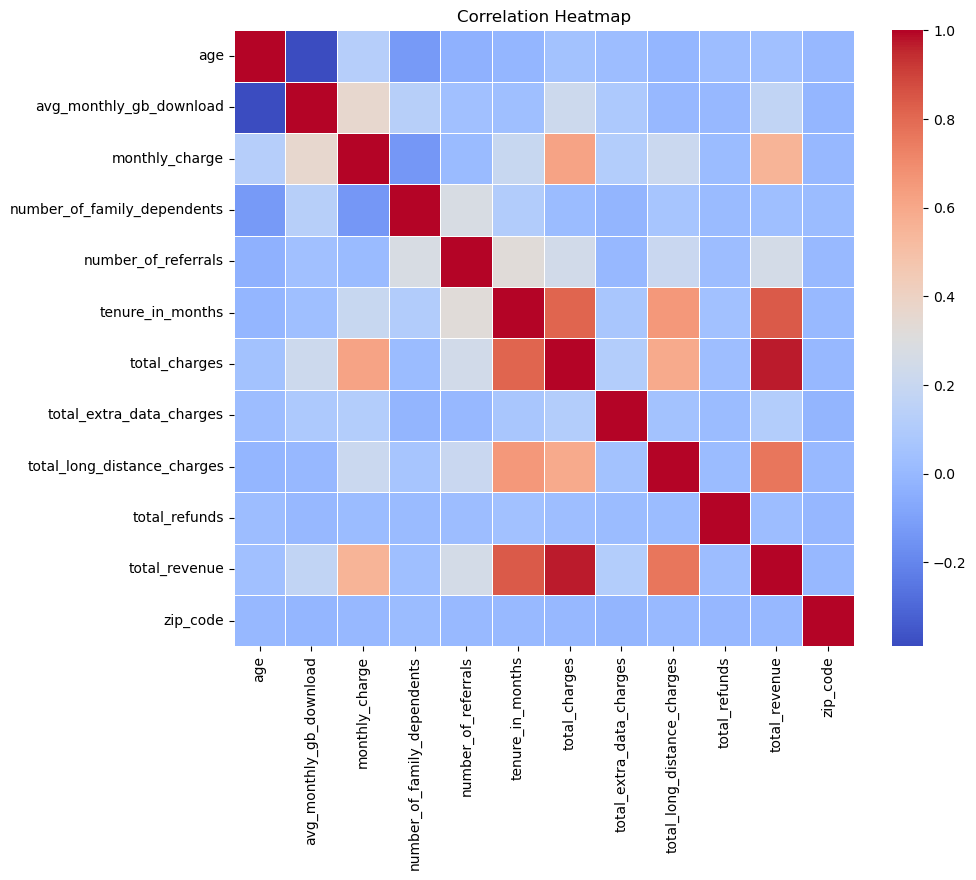

In [252]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<h3>Outlier Detection</h3>

In [254]:
# Outlier detection and handling using the IQR method for numeric columns
def handle_outliers(raw, col):
    Q1 = raw[col].quantile(0.25)
    Q3 = raw[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    raw[col] = raw[col].clip(lower_bound, upper_bound)

# Numeric columns to check for outliers
numeric_cols_with_outliers = [
    'age', 'number_of_family_dependents', 'number_of_referrals', 'tenure_in_months',
    'monthly_charge', 'total_charges', 'total_refunds', 'total_extra_data_charges',
    'total_long_distance_charges', 'total_revenue'
]

# Apply outlier handling
for col in numeric_cols_with_outliers:
    handle_outliers(raw, col)

# Convert categorical variables to dummies
categorical_cols = [
    'gender', 'married', 'offer', 'internet_service', 'internet_type', 'online_security', 
    'online_backup', 'device_protection_plan', 'premium_tech_support', 'streaming_tv',
    'streaming_movies', 'streaming_music', 'subscription_type', 'paperless_billing', 
    'payment_method'
]
df_encoded = pd.get_dummies(raw, columns=categorical_cols, drop_first=True)


In [255]:
df_encoded

,age,avg_monthly_gb_download,monthly_charge,number_of_family_dependents,number_of_referrals,tenure_in_months,total_charges,total_extra_data_charges,total_long_distance_charges,total_refunds,total_revenue,unlimited_hi-res_streaming,viewer_status,zip_code,gender_Male,married_Yes,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E,internet_service_Yes,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,online_security_Yes,online_backup_Yes,device_protection_plan_Yes,premium_tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,streaming_music_Yes,subscription_type_One Year,subscription_type_Two Year,paperless_billing_Yes,payment_method_Credit Card,payment_method_Mailed Check
0,37,16.0,65.60,0,2.0,9,593.30,0,381.51,0.0,974.81,Yes,Stayed,93225,False,True,False,False,False,False,True,False,False,False,False,True,False,True,True,False,False,True,False,True,True,False
1,46,10.0,-4.00,0,0.0,9,542.40,0,96.21,0.0,610.28,No,Stayed,91206,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False
2,50,30.0,73.90,0,0.0,4,280.85,0,134.60,0.0,415.45,Yes,Churned,92627,True,False,False,False,False,True,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False
3,78,4.0,98.00,0,1.0,13,1237.85,0,361.66,0.0,1599.51,Yes,Churned,94553,True,True,False,False,True,False,True,False,True,False,False,True,True,False,True,True,False,False,False,True,False,False
4,75,11.0,83.90,0,3.0,3,267.40,0,22.14,0.0,289.54,Yes,Churned,93010,False,True,False,False,False,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6583,36,0.0,20.95,0,0.0,4,85.50,0,8.04,0.0,93.54,No,Churned,92028,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
6584,20,59.0,55.15,0,0.0,13,742.90,0,606.84,0.0,1349.74,Yes,Stayed,91941,False,False,False,False,True,False,True,True,False,False,True,False,False,True,False,False,True,True,False,False,True,False
6585,40,17.0,85.10,0,1.0,22,1873.70,0,356.40,0.0,2230.10,Yes,Churned,95367,True,True,False,False,True,False,True,False,True,False,False,False,False,False,False,True,True,False,False,True,False,False
6586,21,58.0,67.85,0,5.0,67,4627.65,0,142.04,0.0,4769.69,Yes,Stayed,92075,True,True,False,False,False,False,True,False,False,False,True,False,True,True,False,True,True,False,True,False,True,False


<h2>1. Exploratory Data Analysis</h2>

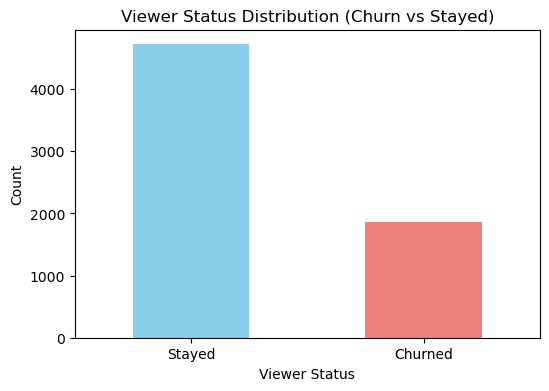

In [257]:
# Normalize numeric columns
numeric_cols = [
    'age', 'number_of_family_dependents', 'number_of_referrals', 'tenure_in_months',
    'monthly_charge', 'total_charges', 'total_refunds', 'total_extra_data_charges',
    'total_long_distance_charges', 'total_revenue'
]
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

# EDA: Plot class distribution (Churn vs Stayed)
viewer_status_distribution = raw['viewer_status'].value_counts()
plt.figure(figsize=(6, 4))
viewer_status_distribution.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Viewer Status Distribution (Churn vs Stayed)')
plt.xlabel('Viewer Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [258]:
df_encoded

,age,avg_monthly_gb_download,monthly_charge,number_of_family_dependents,number_of_referrals,tenure_in_months,total_charges,total_extra_data_charges,total_long_distance_charges,total_refunds,total_revenue,unlimited_hi-res_streaming,viewer_status,zip_code,gender_Male,married_Yes,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E,internet_service_Yes,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,online_security_Yes,online_backup_Yes,device_protection_plan_Yes,premium_tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,streaming_music_Yes,subscription_type_One Year,subscription_type_Two Year,paperless_billing_Yes,payment_method_Credit Card,payment_method_Mailed Check
0,-0.579437,16.0,0.018526,0.0,0.047981,-1.063833,-0.811620,0.0,-0.490130,0.0,-0.791888,Yes,Stayed,93225,False,True,False,False,False,False,True,False,False,False,False,True,False,True,True,False,False,True,False,True,True,False
1,-0.044980,10.0,-2.219714,0.0,-0.697968,-1.063833,-0.834098,0.0,-0.829747,0.0,-0.919653,No,Stayed,91206,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False
2,0.192557,30.0,0.285443,0.0,-0.697968,-1.272474,-0.949598,0.0,-0.784048,0.0,-0.987940,Yes,Churned,92627,True,False,False,False,False,True,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False
3,1.855312,4.0,1.060466,0.0,-0.324994,-0.896919,-0.526988,0.0,-0.513759,0.0,-0.572935,Yes,Churned,94553,True,True,False,False,True,False,True,False,True,False,False,True,True,False,True,True,False,False,False,True,False,False
4,1.677160,11.0,0.607029,0.0,0.420955,-1.314203,-0.955538,0.0,-0.917918,0.0,-1.032070,Yes,Churned,93010,False,True,False,False,False,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6583,-0.638821,0.0,-1.417357,0.0,-0.697968,-1.272474,-1.035865,0.0,-0.934703,0.0,-1.100767,No,Churned,92028,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
6584,-1.588967,59.0,-0.317532,0.0,-0.697968,-0.896919,-0.745557,0.0,-0.221901,0.0,-0.660477,Yes,Stayed,91941,False,False,False,False,True,False,True,True,False,False,True,False,False,True,False,False,True,True,False,False,True,False
6585,-0.401285,17.0,0.645619,0.0,-0.324994,-0.521364,-0.246197,0.0,-0.520021,0.0,-0.351917,Yes,Churned,95367,True,True,False,False,True,False,True,False,True,False,False,False,False,False,False,True,True,False,False,True,False,False
6586,-1.529583,58.0,0.090883,0.0,1.166904,1.356413,0.969946,0.0,-0.775191,0.0,0.538192,Yes,Stayed,92075,True,True,False,False,False,False,True,False,False,False,True,False,True,True,False,True,True,False,True,False,True,False


In [259]:
numeric_cols = raw.select_dtypes(include=['float64','int64']).columns

# Summary statistics for numeric features grouped by viewer_status
summary_by_status = raw.groupby('viewer_status')[numeric_cols].mean()

print(summary_by_status)

                     age  avg_monthly_gb_download  monthly_charge  \
viewer_status                                                       
Churned        49.735688                22.175495       73.347592   
Stayed         45.577877                20.363424       61.727252   

               number_of_family_dependents  number_of_referrals  \
viewer_status                                                     
Churned                                0.0             0.517389   
Stayed                                 0.0             2.407608   

               tenure_in_months  total_charges  total_extra_data_charges  \
viewer_status                                                              
Churned               17.979133    1531.796094                       0.0   
Stayed                41.035177    2787.432759                       0.0   

               total_long_distance_charges  total_refunds  total_revenue  \
viewer_status                                                            

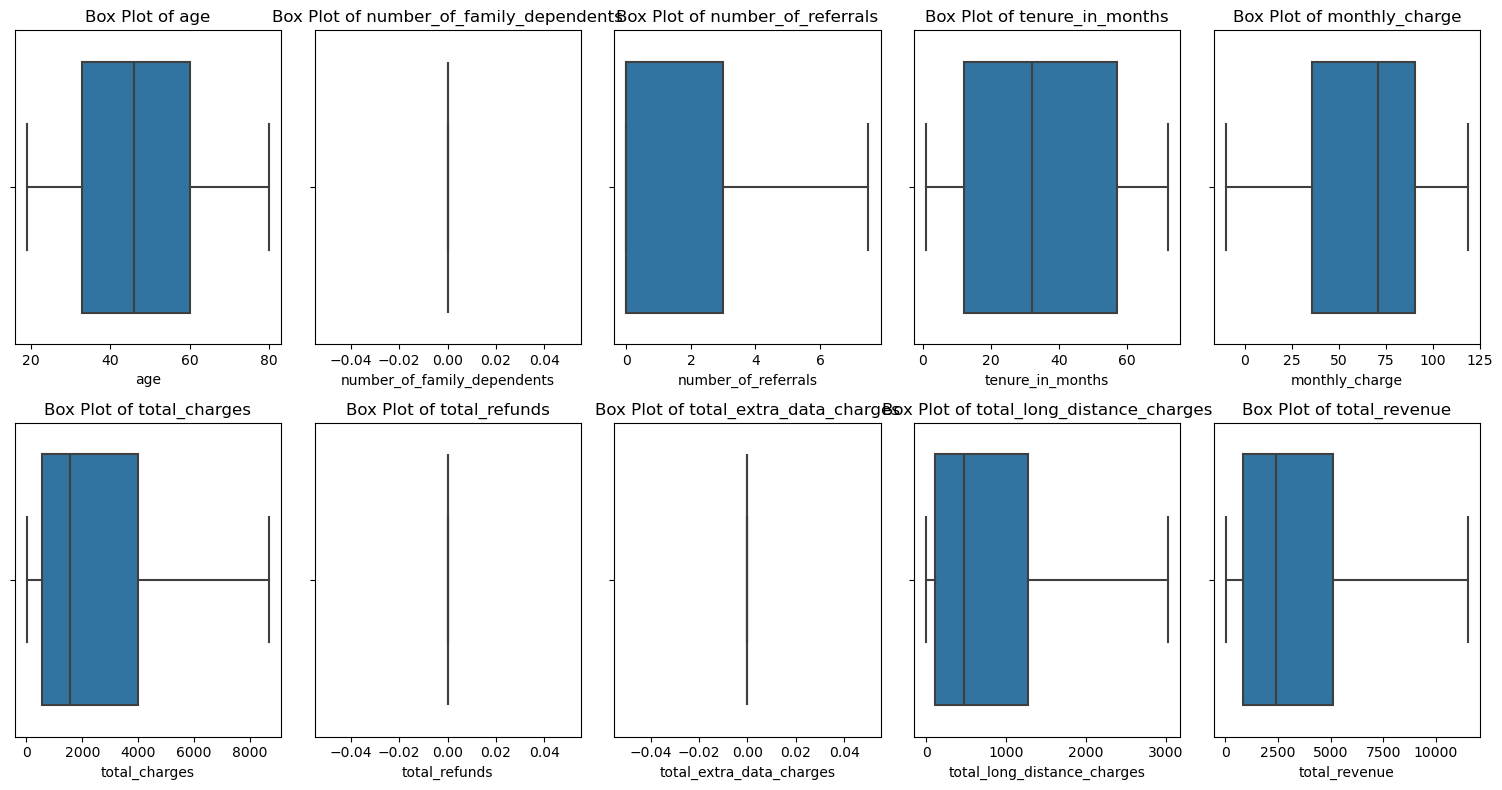

In [260]:
# Define the numeric columns where you want to check for outliers
numeric_cols_with_outliers = [
    'age', 'number_of_family_dependents', 'number_of_referrals', 'tenure_in_months',
    'monthly_charge', 'total_charges', 'total_refunds', 'total_extra_data_charges',
    'total_long_distance_charges', 'total_revenue'
]

# Plot boxplots for each numeric column to visualize outliers
plt.figure(figsize=(15, 8))

# Create subplots for each numeric column
for i, col in enumerate(numeric_cols_with_outliers, 1):
    plt.subplot(2, 5, i)  # Adjust to 2 rows and 5 columns to fit all
    sns.boxplot(data=raw, x=col)
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

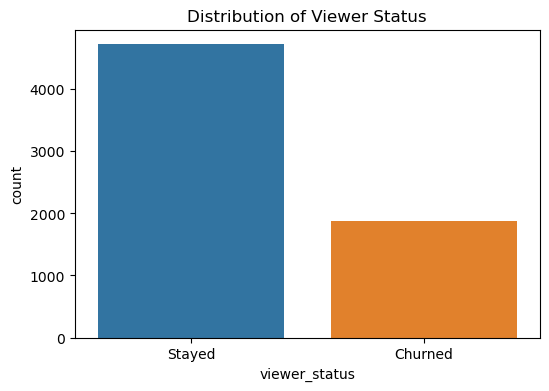

C:\Users\gouta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


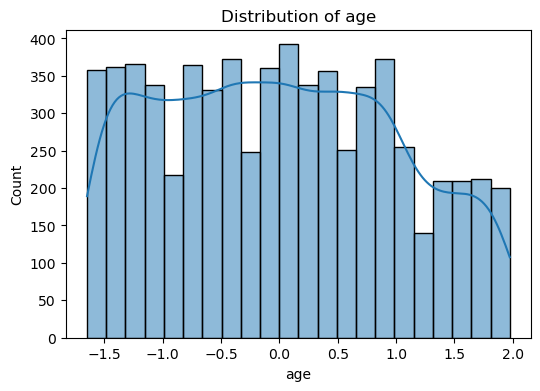

C:\Users\gouta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


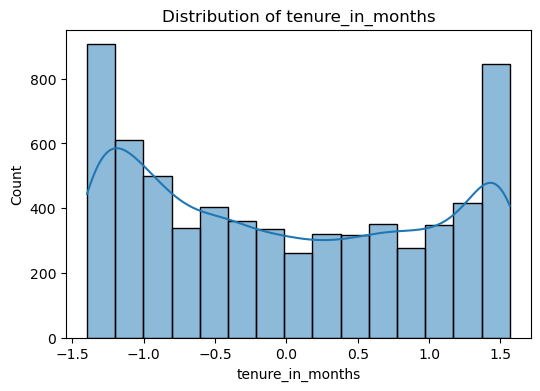

C:\Users\gouta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


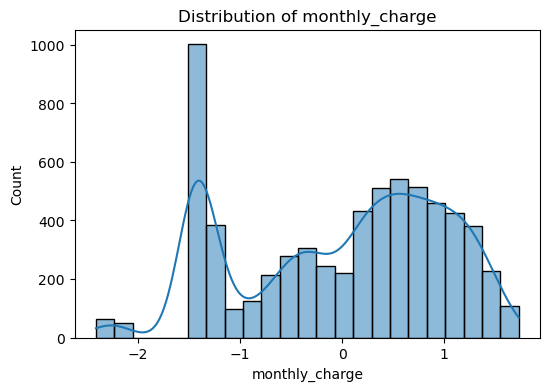

C:\Users\gouta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


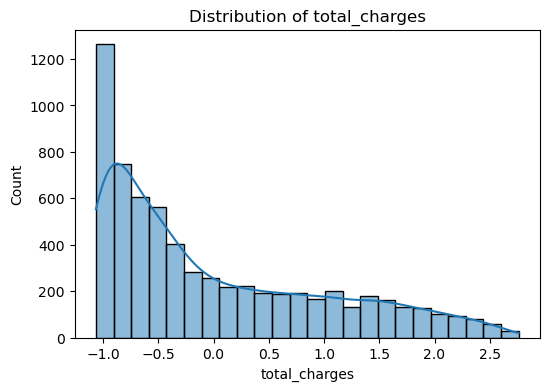

C:\Users\gouta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


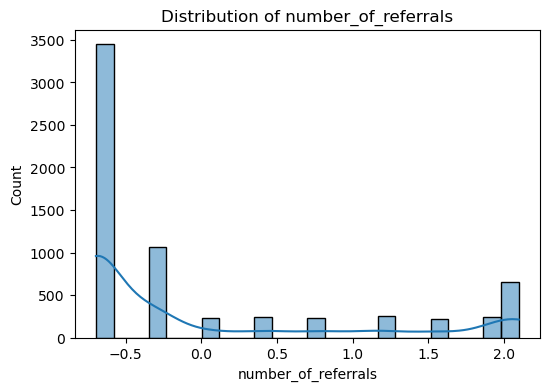

C:\Users\gouta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


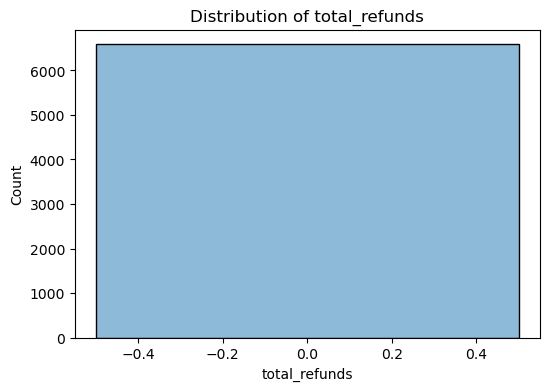

C:\Users\gouta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


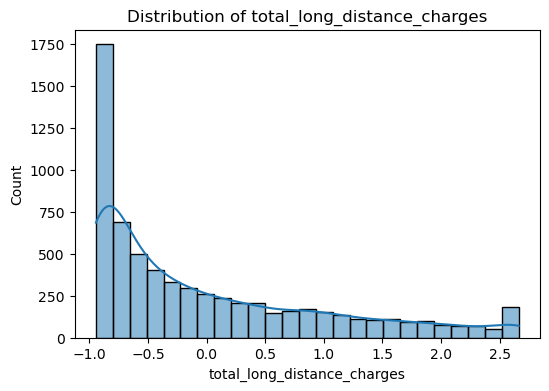

C:\Users\gouta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


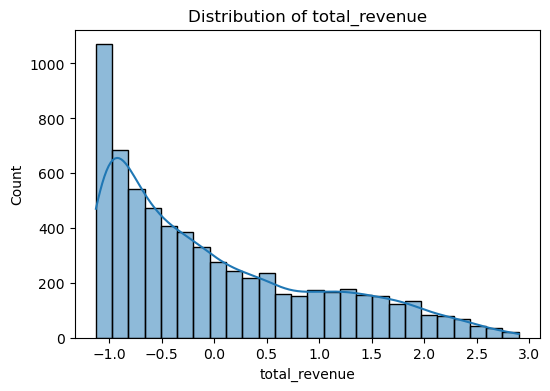

C:\Users\gouta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


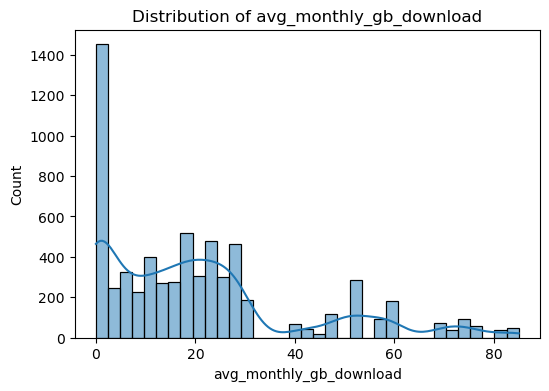

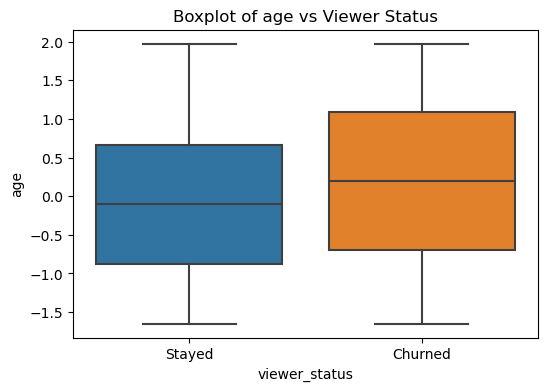

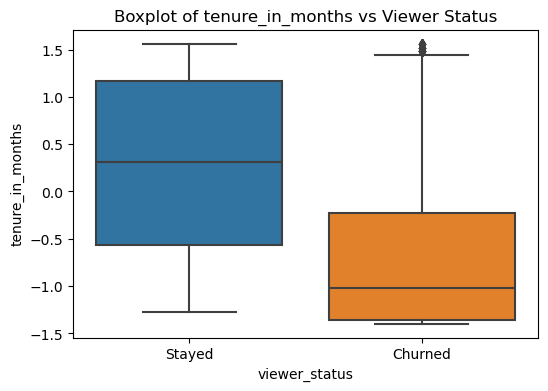

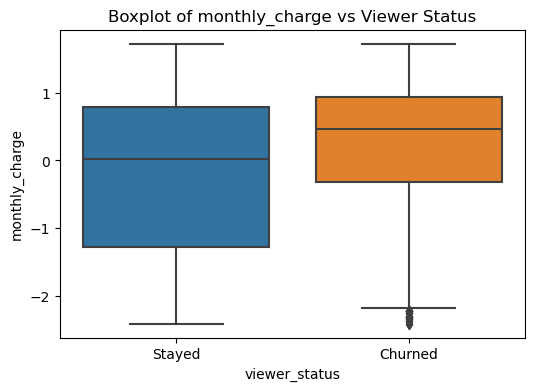

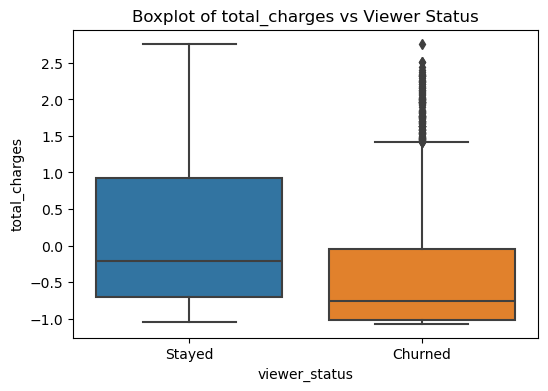

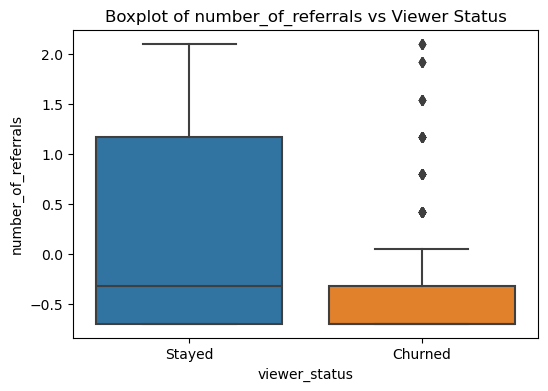

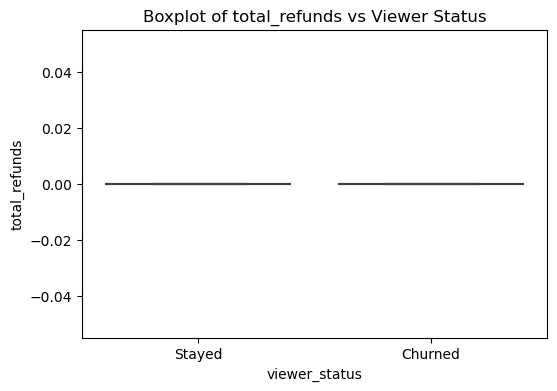

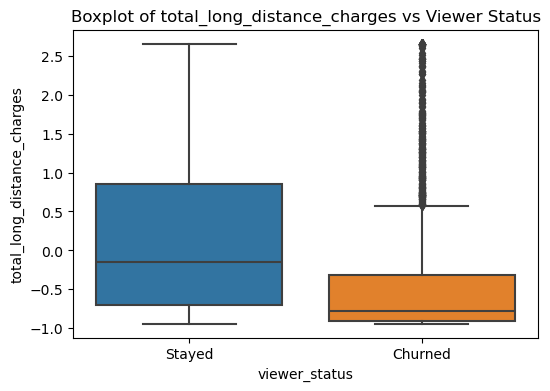

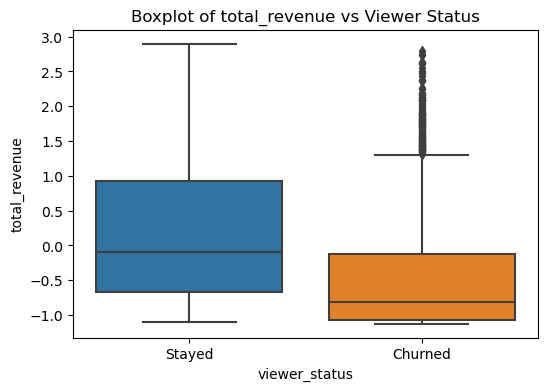

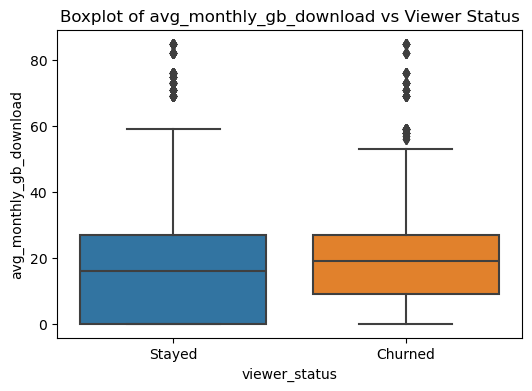

In [261]:
#Target variable distribution (viewer_status)
plt.figure(figsize=(6, 4))
sns.countplot(x='viewer_status', data=df_encoded)
plt.title('Distribution of Viewer Status')
plt.show()


numerical_columns = ['age', 'tenure_in_months', 'monthly_charge', 'total_charges', 'number_of_referrals', 'total_refunds',
                     'total_long_distance_charges', 'total_revenue', 'avg_monthly_gb_download']

for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_encoded[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='viewer_status', y=col, data=df_encoded)
    plt.title(f'Boxplot of {col} vs Viewer Status')
    plt.show()

In [262]:
df_encoded.columns

Index(['age', 'avg_monthly_gb_download', 'monthly_charge',
       'number_of_family_dependents', 'number_of_referrals',
       'tenure_in_months', 'total_charges', 'total_extra_data_charges',
       'total_long_distance_charges', 'total_refunds', 'total_revenue',
       'unlimited_hi-res_streaming', 'viewer_status', 'zip_code',
       'gender_Male', 'married_Yes', 'offer_Offer B', 'offer_Offer C',
       'offer_Offer D', 'offer_Offer E', 'internet_service_Yes',
       'internet_type_DSL', 'internet_type_Fiber Optic', 'internet_type_None',
       'online_security_Yes', 'online_backup_Yes',
       'device_protection_plan_Yes', 'premium_tech_support_Yes',
       'streaming_tv_Yes', 'streaming_movies_Yes', 'streaming_music_Yes',
       'subscription_type_One Year', 'subscription_type_Two Year',
       'paperless_billing_Yes', 'payment_method_Credit Card',
       'payment_method_Mailed Check'],
      dtype='object')

<h2>2. Segmentation</h2>

In [264]:
# let's check the explained variance
pca.explained_variance_ratio_

array([9.99876087e-01, 1.20811014e-04])

Text(0, 0.5, 'Cumulative Explained Variance Ratio')

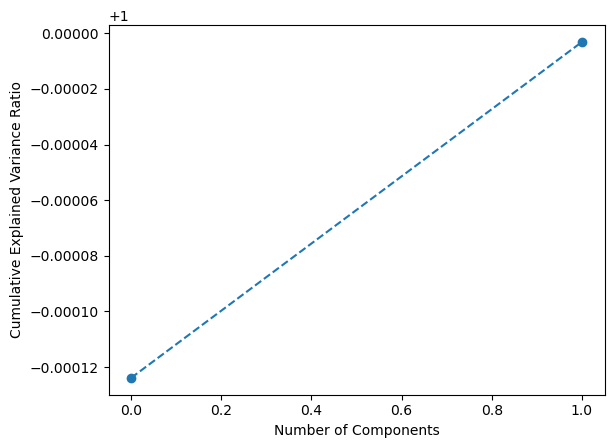

In [265]:
plt.figure()
plt.plot(pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')

# Label the x-axis
plt.xlabel('Number of Components')

# Label the y-axis
plt.ylabel('Cumulative Explained Variance Ratio')

# Hence around 12 components explain 80% of the variation. So we will go with 12 components instead of 30

Index(['unlimited_hi-res_streaming', 'viewer_status'], dtype='object')


C:\Users\gouta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gouta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gouta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gouta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gouta\anaconda3\Lib\site-packages\sklearn\clust

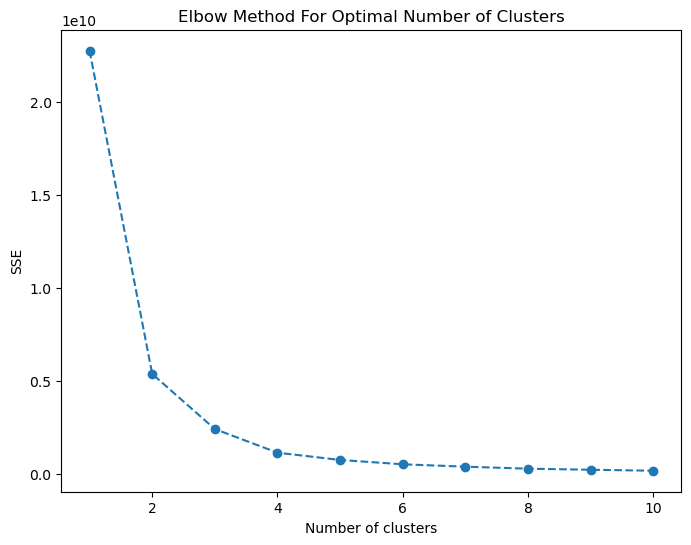

In [270]:
# Identify non-numeric columns in the DataFrame
non_numeric_columns = df_encoded.select_dtypes(include=['object']).columns

# Print non-numeric columns to confirm which ones need encoding
print(non_numeric_columns)

# Apply pd.get_dummies() to convert non-numeric columns to numeric
df_clustering = pd.get_dummies(df_encoded, drop_first=True)


# Determine the optimal number of clusters using the Elbow Method
sse = [] #sum of squares method
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_clustering)
    sse.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [272]:
# Check data types and convert non-numeric columns to dummy variables
if df_encoded.select_dtypes(include=['object']).any().any():
    df_clustering = pd.get_dummies(df_clustering, drop_first=True)

# Confirm the conversion
print(df_clustering.dtypes)

age                               float64
avg_monthly_gb_download           float64
monthly_charge                    float64
number_of_family_dependents       float64
number_of_referrals               float64
tenure_in_months                  float64
total_charges                     float64
total_extra_data_charges          float64
total_long_distance_charges       float64
total_refunds                     float64
total_revenue                     float64
zip_code                            int64
gender_Male                          bool
married_Yes                          bool
offer_Offer B                        bool
offer_Offer C                        bool
offer_Offer D                        bool
offer_Offer E                        bool
internet_service_Yes                 bool
internet_type_DSL                    bool
internet_type_Fiber Optic            bool
internet_type_None                   bool
online_security_Yes                  bool
online_backup_Yes                 

C:\Users\gouta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


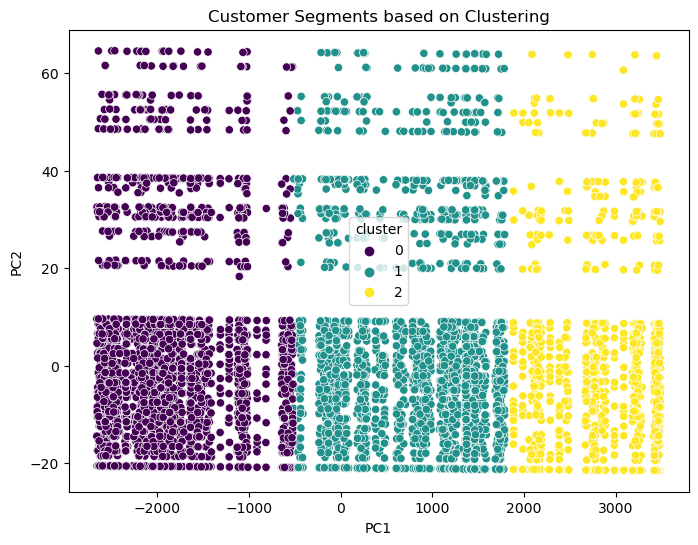

In [274]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_clustering)  # Ensure df_clustering is fully numeric

# Add the cluster labels back to the DataFrame
df_clustering['cluster'] = clusters
df_encoded['cluster']=clusters
# Visualize the clusters using PCA for dimensionality reduction to 2D
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_clustering.drop('cluster', axis=1))

# Create a DataFrame for the PCA components and add cluster labels
df_pca = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
df_pca['cluster'] = clusters

# Plotting
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_pca, palette='viridis')
plt.title('Customer Segments based on Clustering')
plt.show()


<h2>3. Prediction through Supervised Learning</h2>

In [306]:
def remove_collinear_features(df, correlation_threshold=0.9):
    """
    Removes features that are highly collinear based on the correlation threshold.
    """
    # Compute the correlation matrix
    corr_matrix = df.corr().abs()  # Use the absolute value of correlations
    
    # Create a matrix to mark which columns should be removed (lower triangle)
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # Find features with a correlation greater than the threshold
    collinear_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > correlation_threshold)]
    
    # Remove the collinear features from the dataframe
    df_reduced = df.drop(columns=collinear_features)
    
    print(f"Removed {len(collinear_features)} collinear features: {collinear_features}")
    
    return df_reduced

In [308]:
# Define the columns to exclude from feature selection
columns_to_exclude = ['viewer_status', 'cluster']

# Select columns to perform feature selection on (excluding the specified columns)
df_clustering = df_encoded.drop(columns=columns_to_exclude, errors='ignore')

# Identify non-numeric columns in df_clustering
non_numeric_columns = df_clustering.select_dtypes(include=['object']).columns

# Print the non-numeric columns to identify which ones need encoding
print(f"Non-numeric columns: {non_numeric_columns}")

# Apply one-hot encoding to the non-numeric columns
df_clustering_encoded = pd.get_dummies(df_clustering, drop_first=True)

# Now proceed to remove collinear features from the encoded dataset
use_features = remove_collinear_features(df_clustering_encoded, correlation_threshold=0.6)

# Check the remaining features after removing collinear ones
print("\n",use_features.columns)

Non-numeric columns: Index(['unlimited_hi-res_streaming'], dtype='object')
Removed 9 collinear features: ['total_charges', 'total_long_distance_charges', 'total_revenue', 'married_Yes', 'internet_service_Yes', 'internet_type_Fiber Optic', 'internet_type_None', 'streaming_music_Yes', 'unlimited_hi-res_streaming_Yes']

 Index(['age', 'avg_monthly_gb_download', 'monthly_charge',
       'number_of_family_dependents', 'number_of_referrals',
       'tenure_in_months', 'total_extra_data_charges', 'total_refunds',
       'zip_code', 'gender_Male', 'offer_Offer B', 'offer_Offer C',
       'offer_Offer D', 'offer_Offer E', 'internet_type_DSL',
       'online_security_Yes', 'online_backup_Yes',
       'device_protection_plan_Yes', 'premium_tech_support_Yes',
       'streaming_tv_Yes', 'streaming_movies_Yes',
       'subscription_type_One Year', 'subscription_type_Two Year',
       'paperless_billing_Yes', 'payment_method_Credit Card',
       'payment_method_Mailed Check'],
      dtype='object')


<h2>Model-1: Logistic Regression Classifier</h2>

In [330]:
from sklearn.linear_model import LogisticRegression
features = ['monthly_charge', 'age', 'tenure_in_months', 'offer', 'number_of_referrals',
            'total_revenue', 'paperless_billing', 'subscription_type']
target = 'viewer_status'

X = raw[features].copy()
y = df_encoded[target]

label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column].astype(str))
    label_encoders[column] = le

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(random_state=42, max_iter=200)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}\n")
print("Classification Report:\n")
print(classification_rep)

Model Accuracy: 0.8392

Classification Report:

              precision    recall  f1-score   support

     Churned       0.72      0.73      0.73       582
      Stayed       0.89      0.88      0.89      1395

    accuracy                           0.84      1977
   macro avg       0.81      0.81      0.81      1977
weighted avg       0.84      0.84      0.84      1977



<h2>Model-2: Random Forest Classifier</h2>

In [334]:
features = ['monthly_charge', 'age', 'tenure_in_months', 'offer', 'number_of_referrals', 
            'total_revenue', 'paperless_billing', 'subscription_type']
target = 'viewer_status'


X = raw[features].copy()
y = df_encoded[target]


label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column].astype(str))
    label_encoders[column] = le

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

best_params = {
    'n_estimators': 200, 
    'min_samples_split': 10, 
    'min_samples_leaf': 4, 
    'max_depth': None, 
    'bootstrap': True,
    'random_state': 42
}
model = RandomForestClassifier(**best_params)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}\n")
print("Classification Report:\n")
print(classification_rep)


Model Accuracy: 0.8655

Classification Report:

              precision    recall  f1-score   support

     Churned       0.84      0.67      0.75       582
      Stayed       0.87      0.95      0.91      1395

    accuracy                           0.87      1977
   macro avg       0.86      0.81      0.83      1977
weighted avg       0.86      0.87      0.86      1977



<h2>Top 5 most predictive factors </h2>

In [336]:
# Get feature importances from the trained RandomForest model
importances = model.feature_importances_

feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

top_features = feature_importances.sort_values(by='Importance', ascending=False).head(5)

print(top_features)

               Feature  Importance
2     tenure_in_months    0.250928
7    subscription_type    0.191900
5        total_revenue    0.172631
0       monthly_charge    0.141950
4  number_of_referrals    0.104713


<h3>Top 5 Most predictive factors</h3>

* tenure_in_months
* subscription_type
* total_revenue
* monthly_charge
* number_of_referrals

<h3>Model Accuracy</h3>

* Logistic Regression: 83.92%
* Random Forest: 86.55%

<h2>Model-1: Linear Regression</h2>

In [342]:
# create a cross-validation object with 5 folds
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [344]:
# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df_encoded['viewer_status'])

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(use_features, y_encoded, test_size=0.2, random_state=42)

# Create a Linear regression model
lr_model = LinearRegression()

# Use cross-validation on the training set to find the mean squared error of the model
mse_scores = -cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='r2')
mean_r2 = r2_scores.mean()

# Calculate the mean MSE and standard deviation of the scores
mean_mse = mse_scores.mean()

print(f'Training set - Mean MSE: {mean_mse:.2f}, Mean R2: {mean_r2:.2f}')

# Evaluate the model on the test set
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
test_mse = ((lr_pred - y_test) ** 2).mean()

print(f'Test set - MSE: {test_mse:.2f}')


Training set - Mean MSE: 0.13, Mean R2: 0.37
Test set - MSE: 0.12


<h2>Model-2: Random Forest Regression</h2>

In [339]:
# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df_encoded['viewer_status'])

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(use_features, y_encoded, test_size=0.2, random_state=42)

# Create a random forest regression model with 100 trees
rf_model = RandomForestRegressor(n_estimators=100, random_state = 42)

# Use cross-validation on the training set to find the mean squared error of the model
mse_scores = -cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')
# #

# Calculate the mean MSE of the scores
mean_mse = mse_scores.mean()
mean_r2 = r2_scores.mean()

print(f'Training set - Mean MSE: {mean_mse:.2f}, Mean R2: {mean_r2:.2f}')

# Evaluate the model on the test set
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
test_mse = ((rf_pred - y_test) ** 2).mean()

print(f'Test set - MSE: {test_mse:.2f}')

Training set - Mean MSE: 0.10, Mean R2: 0.50
Test set - MSE: 0.09


<h2>4. Churan Rate Prediction</h2>

In [282]:
# Churn rate calculation
if 'viewer_status' in df_encoded.columns:
    # Calculate churn rate by cluster
    churn_rate_by_cluster = df_encoded.groupby('cluster')['viewer_status'].value_counts(normalize=True)
    churn_rate_by_cluster = churn_rate_by_cluster.unstack().fillna(0)  # Fill NaN values with 0
    churn_rate_by_cluster['churn_rate'] = churn_rate_by_cluster.get('Churned', 0) * 100  

    # Display churn rate by cluster
    print("Churn Rate by Cluster:")
    print(churn_rate_by_cluster[['churn_rate']])
else:
    print("viewer_status column not found in df_clustering.")

# Calculate the mean of key features by cluster
cluster_means = df_clustering.groupby('cluster').mean()

Churn Rate by Cluster:
viewer_status  churn_rate
cluster                  
0               27.513966
1               30.026707
2               26.654578


In [302]:
high_churn_cluster = churn_rate_by_cluster['churn_rate'].idxmax()

high_churn_profile = df_encoded[df_encoded['cluster'] == high_churn_cluster].describe()

print(f"Customer segment with high-churn is: Cluster {high_churn_cluster}:")
print(high_churn_profile)

Customer segment with high-churn is: Cluster 1:
               age  avg_monthly_gb_download  monthly_charge  \
count  2621.000000              2621.000000     2621.000000   
mean      0.005477                21.799695        0.031740   
std       1.017549                21.056556        0.990391   
min      -1.648351                 0.000000       -2.412666   
25%      -0.876358                 5.000000       -0.790263   
50%      -0.044980                17.000000        0.277403   
75%       0.786398                28.000000        0.816060   
max       1.974081                85.000000        1.724541   

       number_of_family_dependents  number_of_referrals  tenure_in_months  \
count                       2621.0          2621.000000       2621.000000   
mean                           0.0            -0.011502         -0.007091   
std                            0.0             0.986591          1.004173   
min                            0.0            -0.697968         -1.397660   